In [1]:
import pandas as pd

df = pd.read_csv('train.csv')

print(df.head())


   id  temperature  irradiance            humidity  panel_age  \
0   0     7.817315  576.179270   41.24308670850264  32.135501   
1   1    24.785727  240.003973  1.3596482765960705  19.977460   
2   2    46.652695  687.612799   91.26536837560256   1.496401   
3   3    53.339567  735.141179   96.19095521176159  18.491582   
4   4     5.575374   12.241203  27.495073003585226  30.722697   

   maintenance_count  soiling_ratio    voltage   current  module_temperature  \
0                4.0       0.803199  37.403527  1.963787           13.691147   
1                8.0       0.479456  21.843315  0.241473           27.545096   
2                4.0       0.822398  48.222882  4.191800           43.363708   
3                3.0       0.837529  46.295748  0.960567           57.720436   
4                6.0       0.551833   0.000000  0.898062            6.786263   

   cloud_coverage          wind_speed            pressure string_id  \
0       62.494044   12.82491203459621  1018.8665053152533

In [3]:
import pandas as pd

def check_null_values(df):
    """
    This function takes a pandas DataFrame and prints the number of null values for each column.
    """
    null_counts = df.isnull().sum()
    print("Null values in each attribute:\n")
    print(null_counts[null_counts > 0])  # Show only columns with missing values


In [7]:
check_null_values(df)

Null values in each attribute:

temperature           1001
irradiance             987
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
error_code            5912
installation_type     5028
dtype: int64


In [9]:
def check_duplicate_rows(df):
    """
    This function checks and prints the number of duplicate rows in the DataFrame.
    """
    duplicate_count = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_count}")
    
    if duplicate_count > 0:
        print("\nPreview of duplicate rows:")
        print(df[df.duplicated()].head())

check_duplicate_rows(df)


Number of duplicate rows: 0


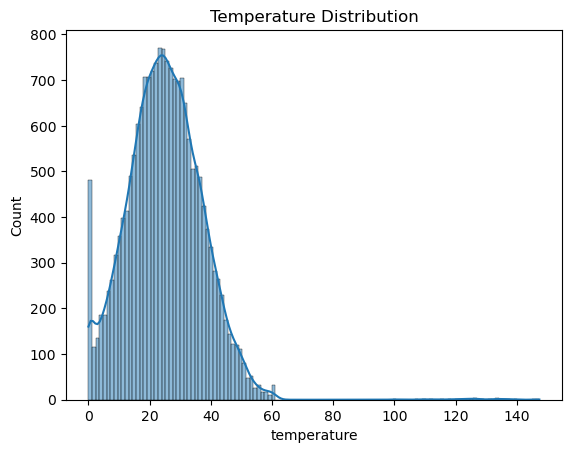

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['temperature'], kde=True)
plt.title("Temperature Distribution")
plt.show()


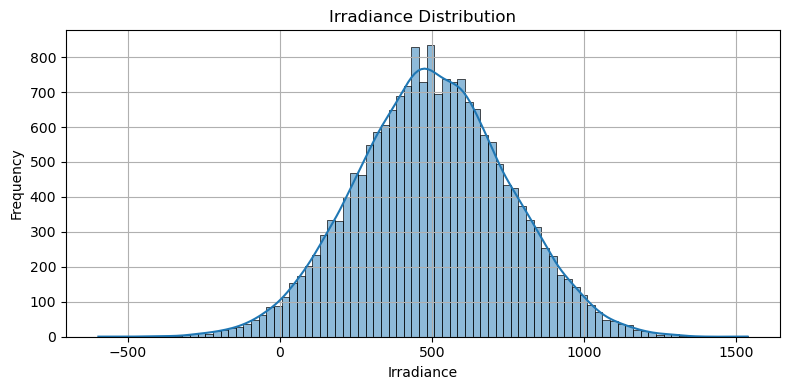

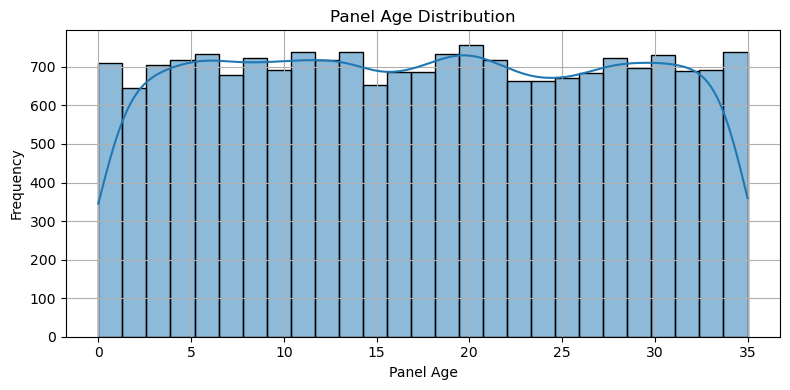

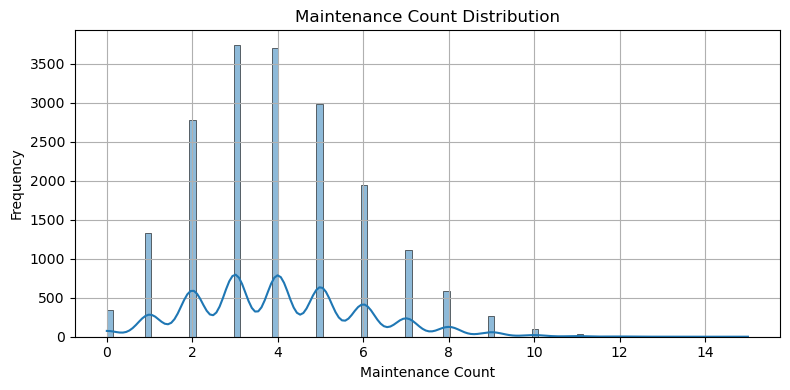

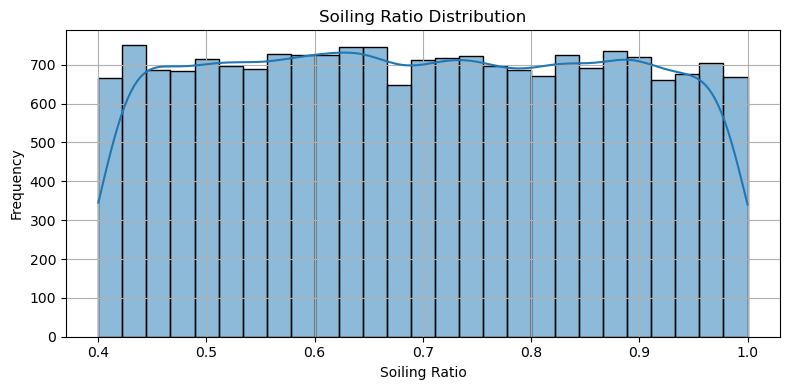

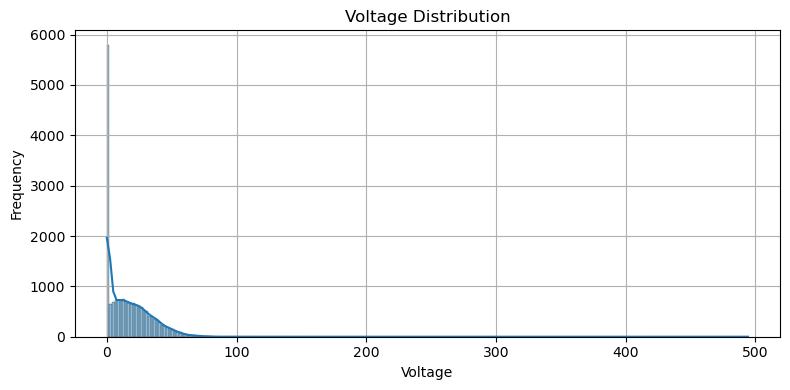

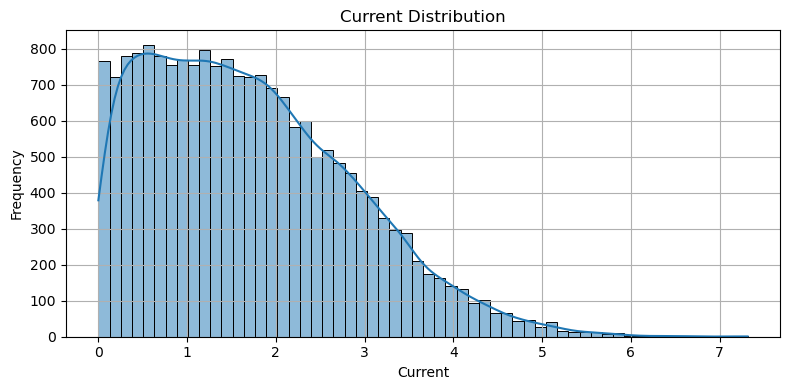

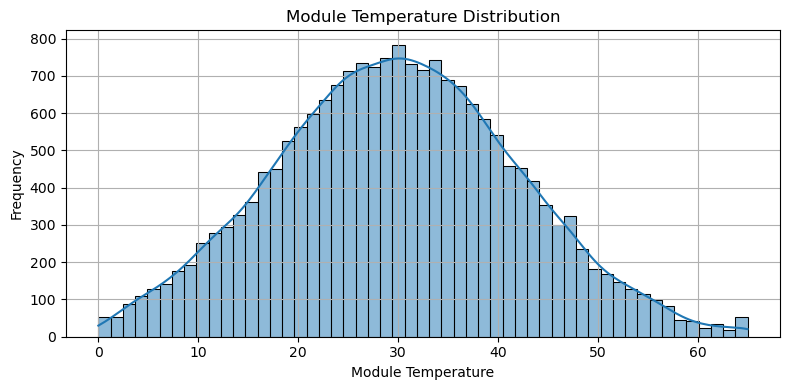

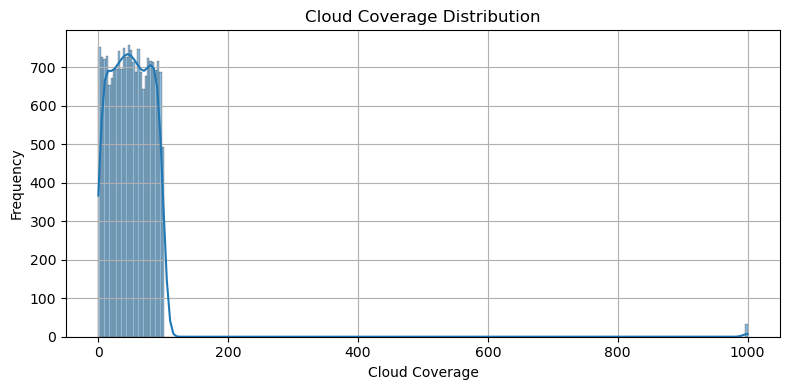

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to plot
columns_to_plot = [
    'irradiance', 'panel_age', 'maintenance_count', 'soiling_ratio',
    'voltage', 'current', 'module_temperature', 'cloud_coverage'
]

# Plot distributions
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [15]:
all_ids_are_int = df['id'].apply(lambda x: isinstance(x, int)).all()

print("All 'id' values are integers:" if all_ids_are_int else "Some 'id' values are NOT integers.")


All 'id' values are integers:


In [25]:
def check_column_is_float(df, column_name):
    return df[column_name].apply(lambda x: isinstance(x, float)).all()

columns_to_check = ['humidity', 'wind_speed', 'pressure', 'efficiency']

for col in columns_to_check:
    is_float = check_column_is_float(df, col)
    print(f"All values in '{col}' are floats: {is_float}")


All values in 'humidity' are floats: False
All values in 'wind_speed' are floats: False
All values in 'pressure' are floats: False
All values in 'efficiency' are floats: True
